In [7]:
# Import statements
library(ggplot2)
library(dplyr)
library(tidyr)
library(grid)
library(repr)
library(gridExtra)
# Note: Syntax to install non-default packages is "install.package(...)"

# Import Dataset

In [8]:
fram = read.csv('framingham.csv', stringsAsFactors = FALSE)

# Introduction to Data Cleaning and Manipulation in R

Link to cheatsheets: https://rstudio.com/resources/cheatsheets/
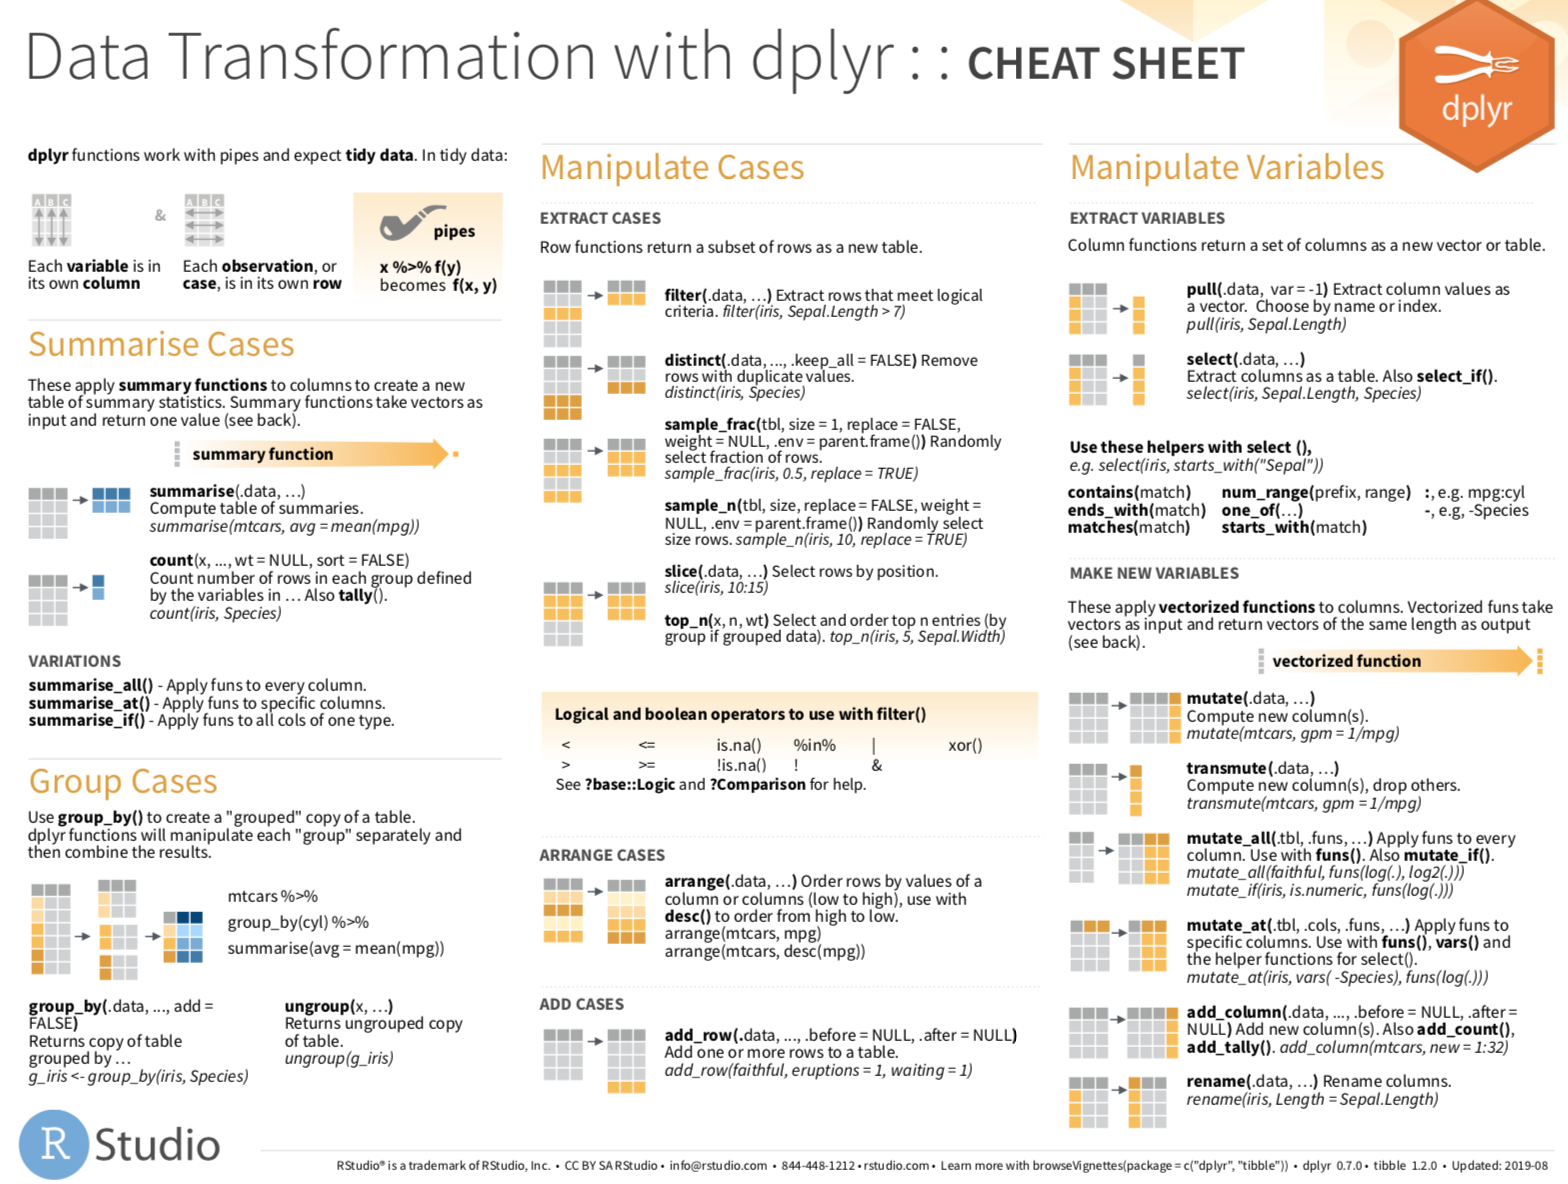
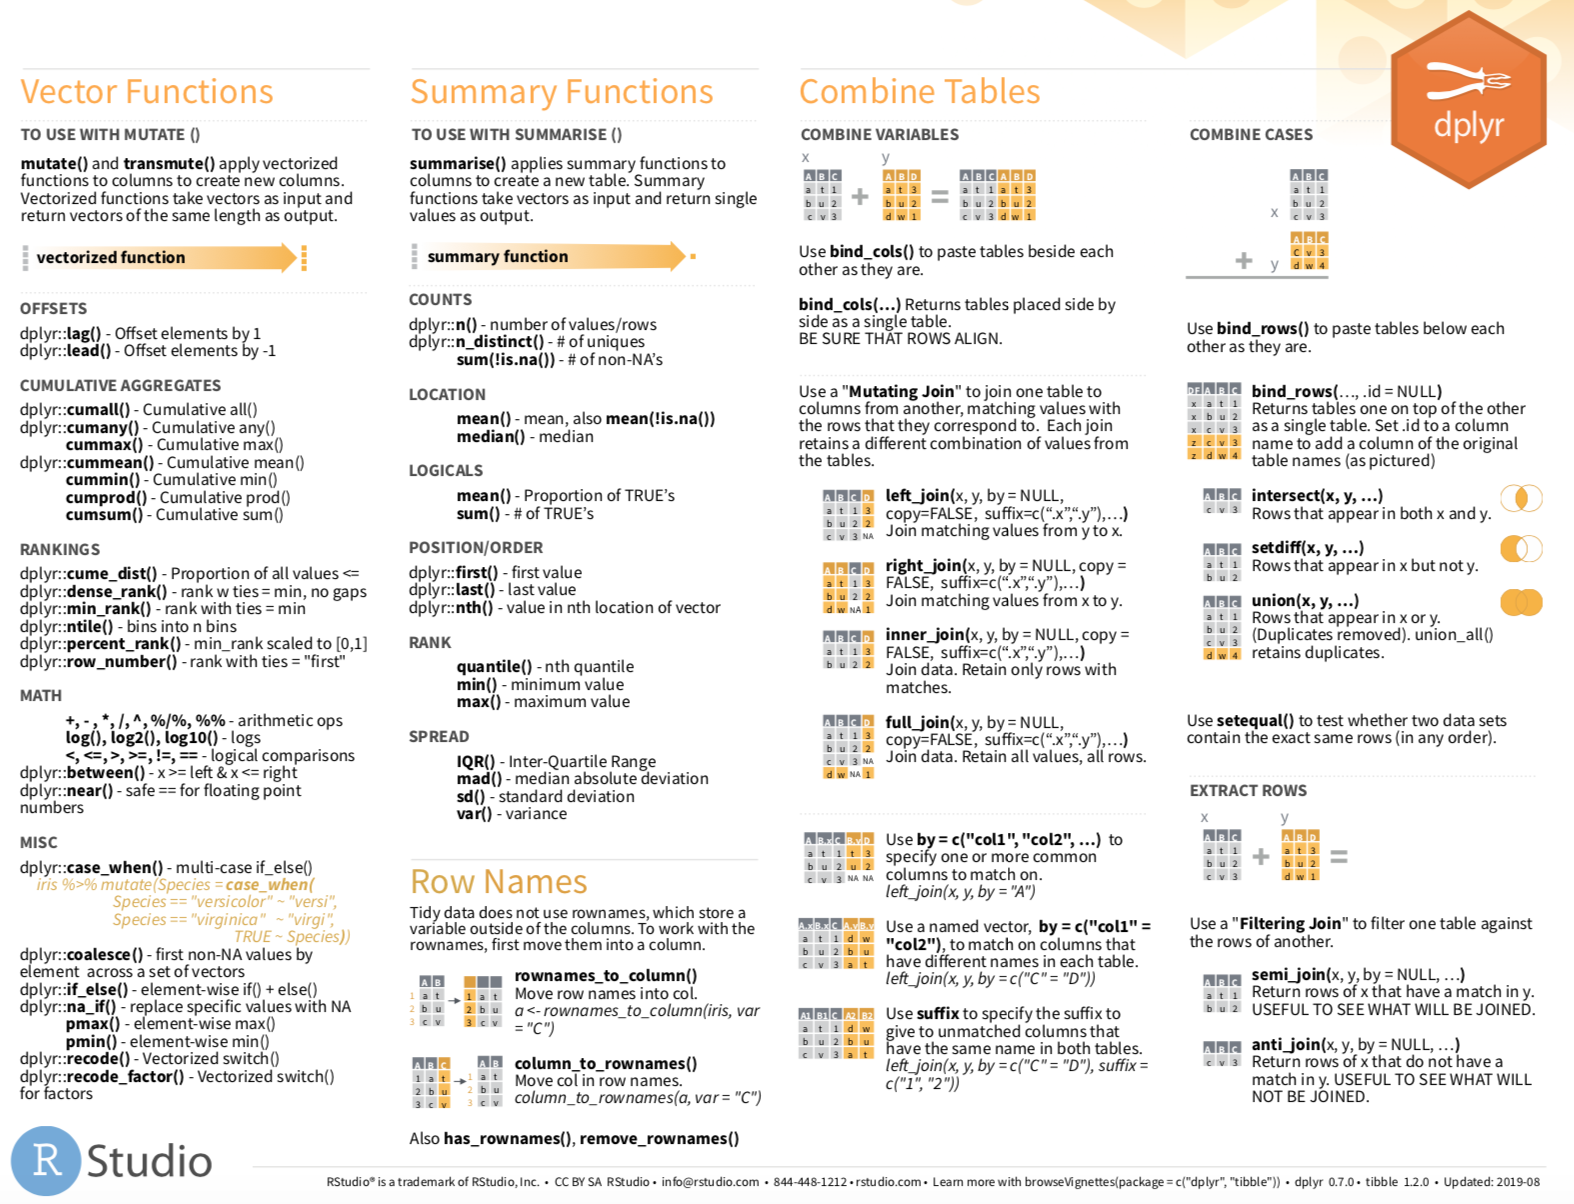

In [3]:
# Show first 6 rows of the dataset
# Notice: similar to pandas head() function
head(fram)

male age education currentSmoker cigsPerDay BPMeds prevalentStroke
1 1    39  4         0              0         0      0              
2 0    46  2         0              0         0      0              
3 1    48  1         1             20         0      0              
4 0    61  3         1             30         0      0              
5 0    46  3         1             23         0      0              
6 0    43  2         0              0         0      0              
  prevalentHyp diabetes totChol sysBP diaBP BMI   heartRate glucose TenYearCHD
1 0            0        195     106.0  70   26.97 80         77     0         
2 0            0        250     121.0  81   28.73 95         76     0         
3 0            0        245     127.5  80   25.34 75         70     0         
4 1            0        225     150.0  95   28.58 65        103     1         
5 0            0        285     130.0  84   23.10 85         85     0         
6 1            0        228     180.0 110   30.30 77         99     0

In [9]:
# Can extract the values of a column by using the '$'
# Note: fram$totChol is equivalent to using fram['totalChol'] in pandas
head(fram$totChol)

[1] 195 250 245 225 285 228

In [10]:
# Can extract all the unique values of the column with the unique() function. 
unique(fram$totChol)

[1] 195 250 245 225 285 228 205 313 260 254 247 294 332 226 221 232 291 190
 [19] 185 234 215 270 272 295 209 175 214 257 178 233 180 243 237  NA 311 208
 [37] 252 261 179 194 267 216 240 266 255 220 235 212 223 300 302 248 200 189
 [55] 258 202 213 183 274 170 210 197 326 188 256 244 193 239 296 269 275 268
 [73] 265 173 273 290 278 264 282 241 288 222 303 246 150 187 286 154 279 293
 [91] 259 219 230 320 312 165 159 174 242 301 167 308 325 229 236 224 253 464
[109] 171 186 227 249 176 163 191 263 196 310 164 135 238 207 342 287 182 352
[127] 284 217 203 262 129 155 323 206 283 319 304 340 328 280 368 218 276 339
[145] 231 198 177 201 277 184 199 168 292 305 306 152 161 181 251 271 370 439
[163] 145 330 157 398 162 314 166 160 281 289 355 307 156 329 143 211 298 334
[181] 192 204 318 309 353 360 335 158 372 346 169 140 324 600 315 392 322 149
[199] 137 172 317 358 153 345 391 410 297 356 338 107 148 366 333 327 344 126
[217] 365 362 316 144 351 390 321 405 359 350 336 380 299 124 371 113 354 382
[235] 364 341 133 367 432 337 696 363 331 361 453 347 373 385 119

In [11]:
# Original data dimensions
dim(fram)

[1] 4240   16

In [12]:
# Cleaning the data to remove all null values for totChol column in the fram data set
fram = filter(fram, !(is.na(totChol)))
# Notice: new data dimensions
dim(fram)

[1] 4190   16

In [13]:
# Can use the head() function to view the first 6 rows of the data set. 
head(fram$male[fram$education == 1])

[1] 1 0 1 1 0 1

## Discussion: What do the values above represent?

In [14]:
# Converting our data types
fram$male[fram$male == 1] <- 'TRUE'
fram$male[fram$male == 0] <- 'FALSE'

## Discussion: What do you expect our male column to look like now?

In [15]:
head(fram$male[fram$education == 1])

[1] "TRUE"  "FALSE" "TRUE"  "TRUE"  "FALSE" "TRUE"

In [6]:
head(fram)

male age education currentSmoker cigsPerDay BPMeds prevalentStroke
1 1    39  4         0              0         0      0              
2 0    46  2         0              0         0      0              
3 1    48  1         1             20         0      0              
4 0    61  3         1             30         0      0              
5 0    46  3         1             23         0      0              
6 0    43  2         0              0         0      0              
  prevalentHyp diabetes totChol sysBP diaBP BMI   heartRate glucose TenYearCHD
1 0            0        195     106.0  70   26.97 80         77     0         
2 0            0        250     121.0  81   28.73 95         76     0         
3 0            0        245     127.5  80   25.34 75         70     0         
4 1            0        225     150.0  95   28.58 65        103     1         
5 0            0        285     130.0  84   23.10 85         85     0         
6 1            0        228     180.0 110   30.30 77         99     0

In [16]:
# Can use the filter() function from the dpylr package to extract only those who have more than 20 cigs a day
over_20_cigs = filter(fram, fram$cigsPerDay > 20)
# Can use the count, max, min, var, etc. functions from dpylr on the grouped dataframe 
# Notice: syntax is very similar to that of pandas
over_20_cigs_by_gender = count(group_by(over_20_cigs, over_20_cigs$male))
# Renaming each column; Ex:"is_male" is the new column name, "over_20_cigs$male" is the old column name
over_20_cigs_by_gender = rename(over_20_cigs_by_gender, is_male='over_20_cigs$male', count='n')
head(over_20_cigs_by_gender)

is_male count
1 FALSE    89  
2 TRUE    362

In [17]:
# Adding a new column
fram <- transform(fram, obese = ifelse(fram$BMI >= 30, TRUE, FALSE))
head(fram, 10)

male  age education currentSmoker cigsPerDay BPMeds prevalentStroke
1  TRUE  39  4         0              0         0      0              
2  FALSE 46  2         0              0         0      0              
3  TRUE  48  1         1             20         0      0              
4  FALSE 61  3         1             30         0      0              
5  FALSE 46  3         1             23         0      0              
6  FALSE 43  2         0              0         0      0              
7  FALSE 63  1         0              0         0      0              
8  FALSE 45  2         1             20         0      0              
9  TRUE  52  1         0              0         0      0              
10 TRUE  43  1         1             30         0      0              
   prevalentHyp diabetes totChol sysBP diaBP BMI   heartRate glucose TenYearCHD
1  0            0        195     106.0  70   26.97 80         77     0         
2  0            0        250     121.0  81   28.73 95         76     0         
3  0            0        245     127.5  80   25.34 75         70     0         
4  1            0        225     150.0  95   28.58 65        103     1         
5  0            0        285     130.0  84   23.10 85         85     0         
6  1            0        228     180.0 110   30.30 77         99     0         
7  0            0        205     138.0  71   33.11 60         85     1         
8  0            0        313     100.0  71   21.68 79         78     0         
9  1            0        260     141.5  89   26.36 76         79     0         
10 1            0        225     162.0 107   23.61 93         88     0         
   obese
1  FALSE
2  FALSE
3  FALSE
4  FALSE
5  FALSE
6   TRUE
7   TRUE
8  FALSE
9  FALSE
10 FALSE

## Discussion: What is the new variable? What is its data type? How would you convert it to a string or integer data type?

## Exercise: Can you find the average total cholesterol for all diabetes patients?
Hint: You can use a function from above and a summary function from the cheat sheet!

In [ ]:
# Answer
avg_diabetes_chol = mean(filter(fram, diabetes == 1)$totChol)
avg_diabetes_chol

## Additional Material
Can use dplyr to join different tables, select individual rows, etc. 
Similar to Pandas.

# Introductory Data Visualization in R

Link to cheatsheets: https://rstudio.com/resources/cheatsheets/
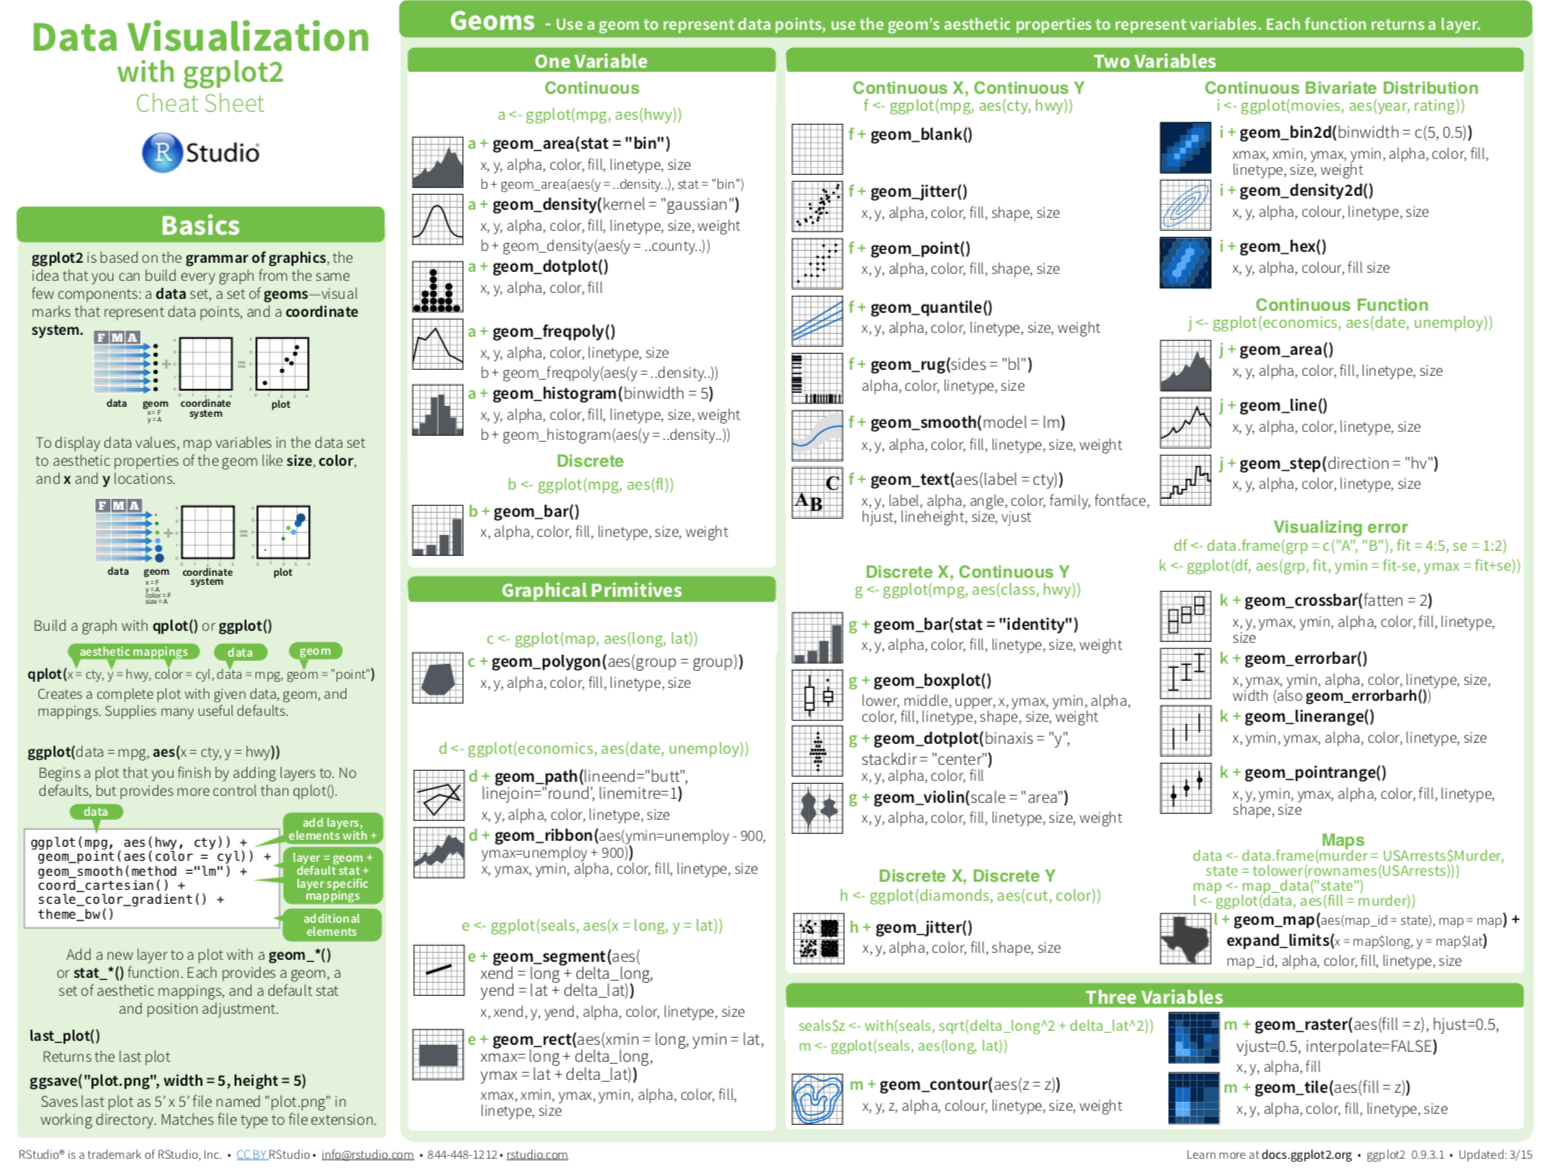
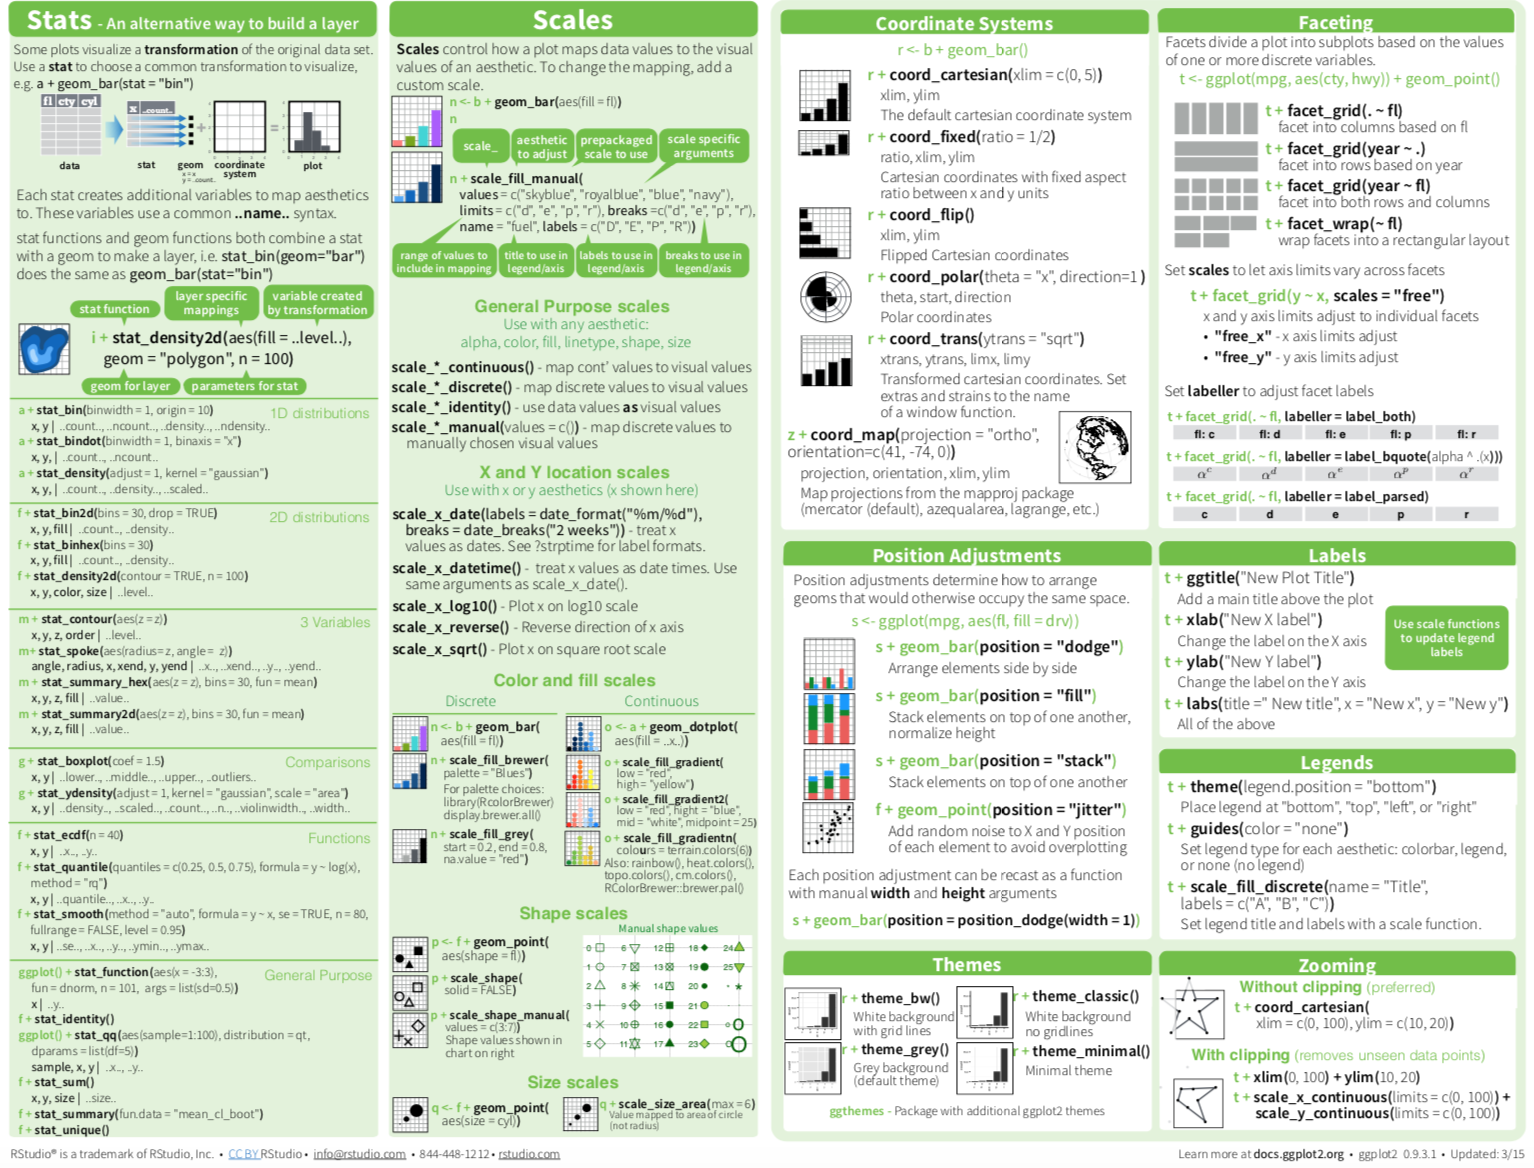

In [ ]:
dataset <- data.frame(fram)

In [ ]:
# Note: The options function helps us change the size of the graph in the Jupyter notebook
# Note: Must import repr library to set height and width
options(repr.plot.width=3, repr.plot.height=3)
# Building a boxplot with ggplot2. 
chol_by_gender = ggplot() + geom_boxplot(data = dataset, 
                   aes(x = dataset[,'male'], y= dataset[,'totChol']), 
                   fill = "skyblue", colour = "black", size=.2,
                   alpha = 0.6, width = .1) + xlab('Is Male') + ylab('Cholestrol')
chol_by_gender

## Discussion: What happens when you remove the aes() function? What about when you remove the colour or size variables? How can you add a plot title?

In [ ]:
# Generating a density plot using geom_density()
chol_density = ggplot() + geom_density(data = dataset, 
                   aes(x = dataset[,'totChol']), 
                   fill = "skyblue" , colour = "black", size=.2,
                   alpha = 0.6) + xlab('Total Cholestrol')
chol_density

In [ ]:
# Re-adjusting height and width for new plot size
options(repr.plot.width=6, repr.plot.height=3)
# Note: must import library grid to run arrange function
# Note: ncol=2 defines the number of columns in our graph
grid.arrange(chol_by_gender, chol_density, ncol=2)

## Exercise: Can you replicate this graph?
Hint: What type of graph is the last graph? You can refer to graph types in the ggplot2 cheatsheet!
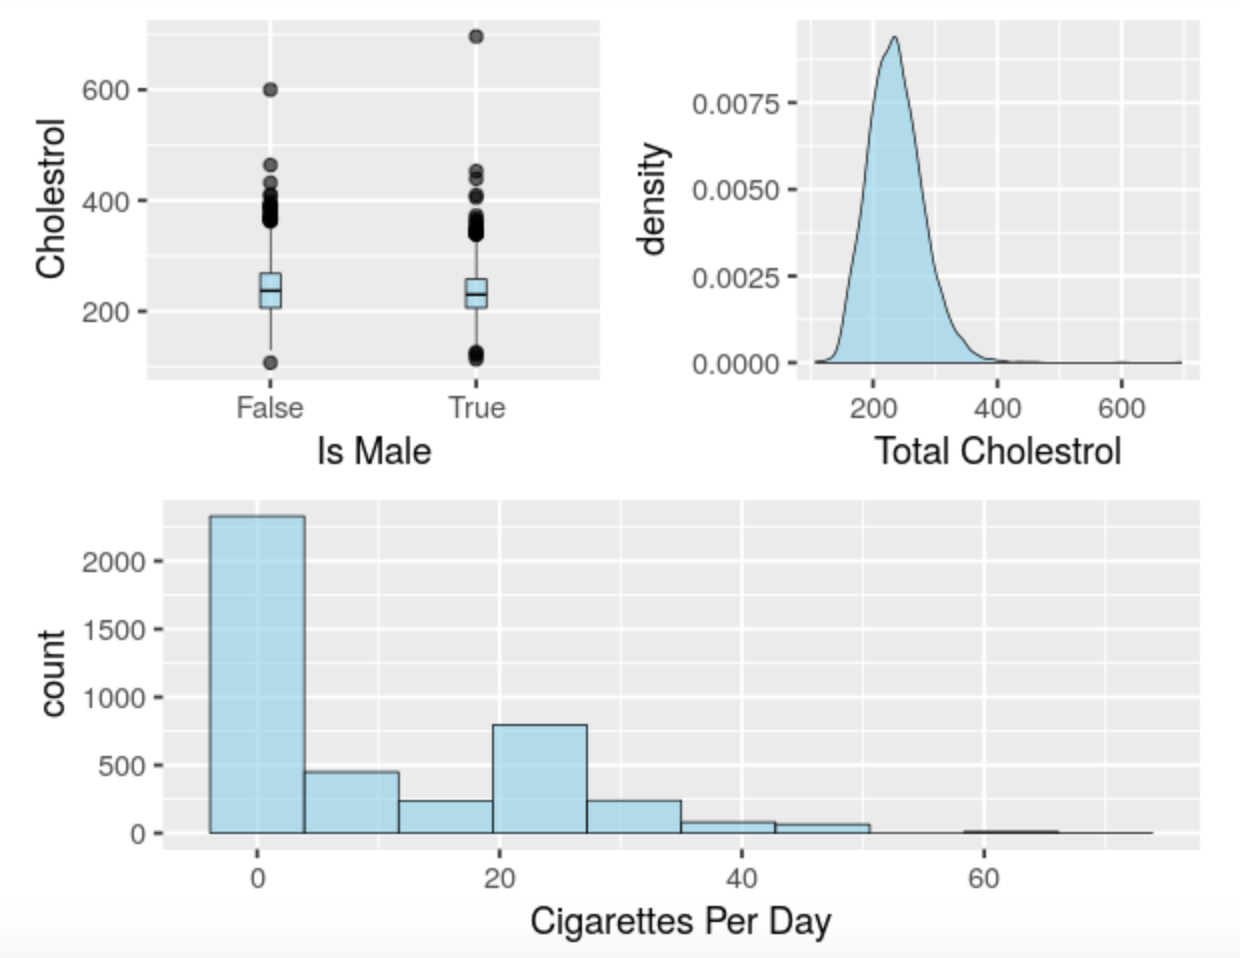

In [ ]:
# Answer

# Histogram of Cigarettes
cigs_hist = ggplot() + geom_histogram(data = dataset, 
                   aes(x = dataset[,'cigsPerDay']), 
                   fill = "skyblue" , bins=10, colour = "black", size=.2,
                   alpha = 0.6) + xlab('Cigarettes Per Day')
# Fix plot dimensions
options(repr.plot.width=5, repr.plot.height=4)
# Nested Grid arrange
grid.arrange(grid.arrange(chol_by_gender, chol_density, ncol=2, nrow=1), 
             cigs_hist, nrow=2, ncol=1)

## Additional Information
If you want to make your graphs more complicated like the plot below, you can look at marrangeGrob, arrangeGrob, plot_grid to create a more complex grid of plots

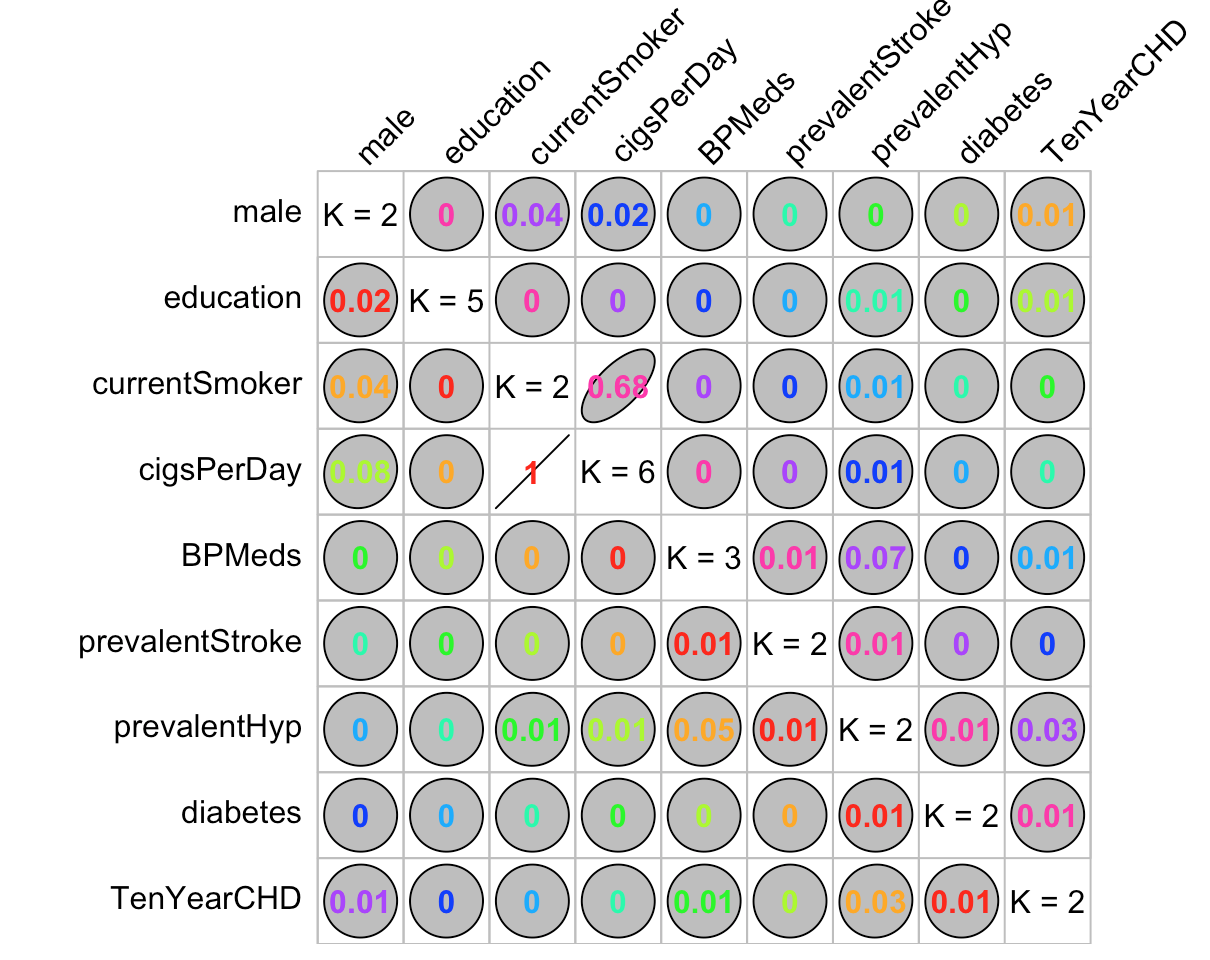

# Introduction to Statistical Analysis in R

In [ ]:
# Summarizes all the quantitative variables in the data set
summary(fram)

## Discussion: What happens when there is a qualitative variable? Is it accurately represented using this function?


Link to Cheatsheet: https://rstudio.com/resources/cheatsheets/
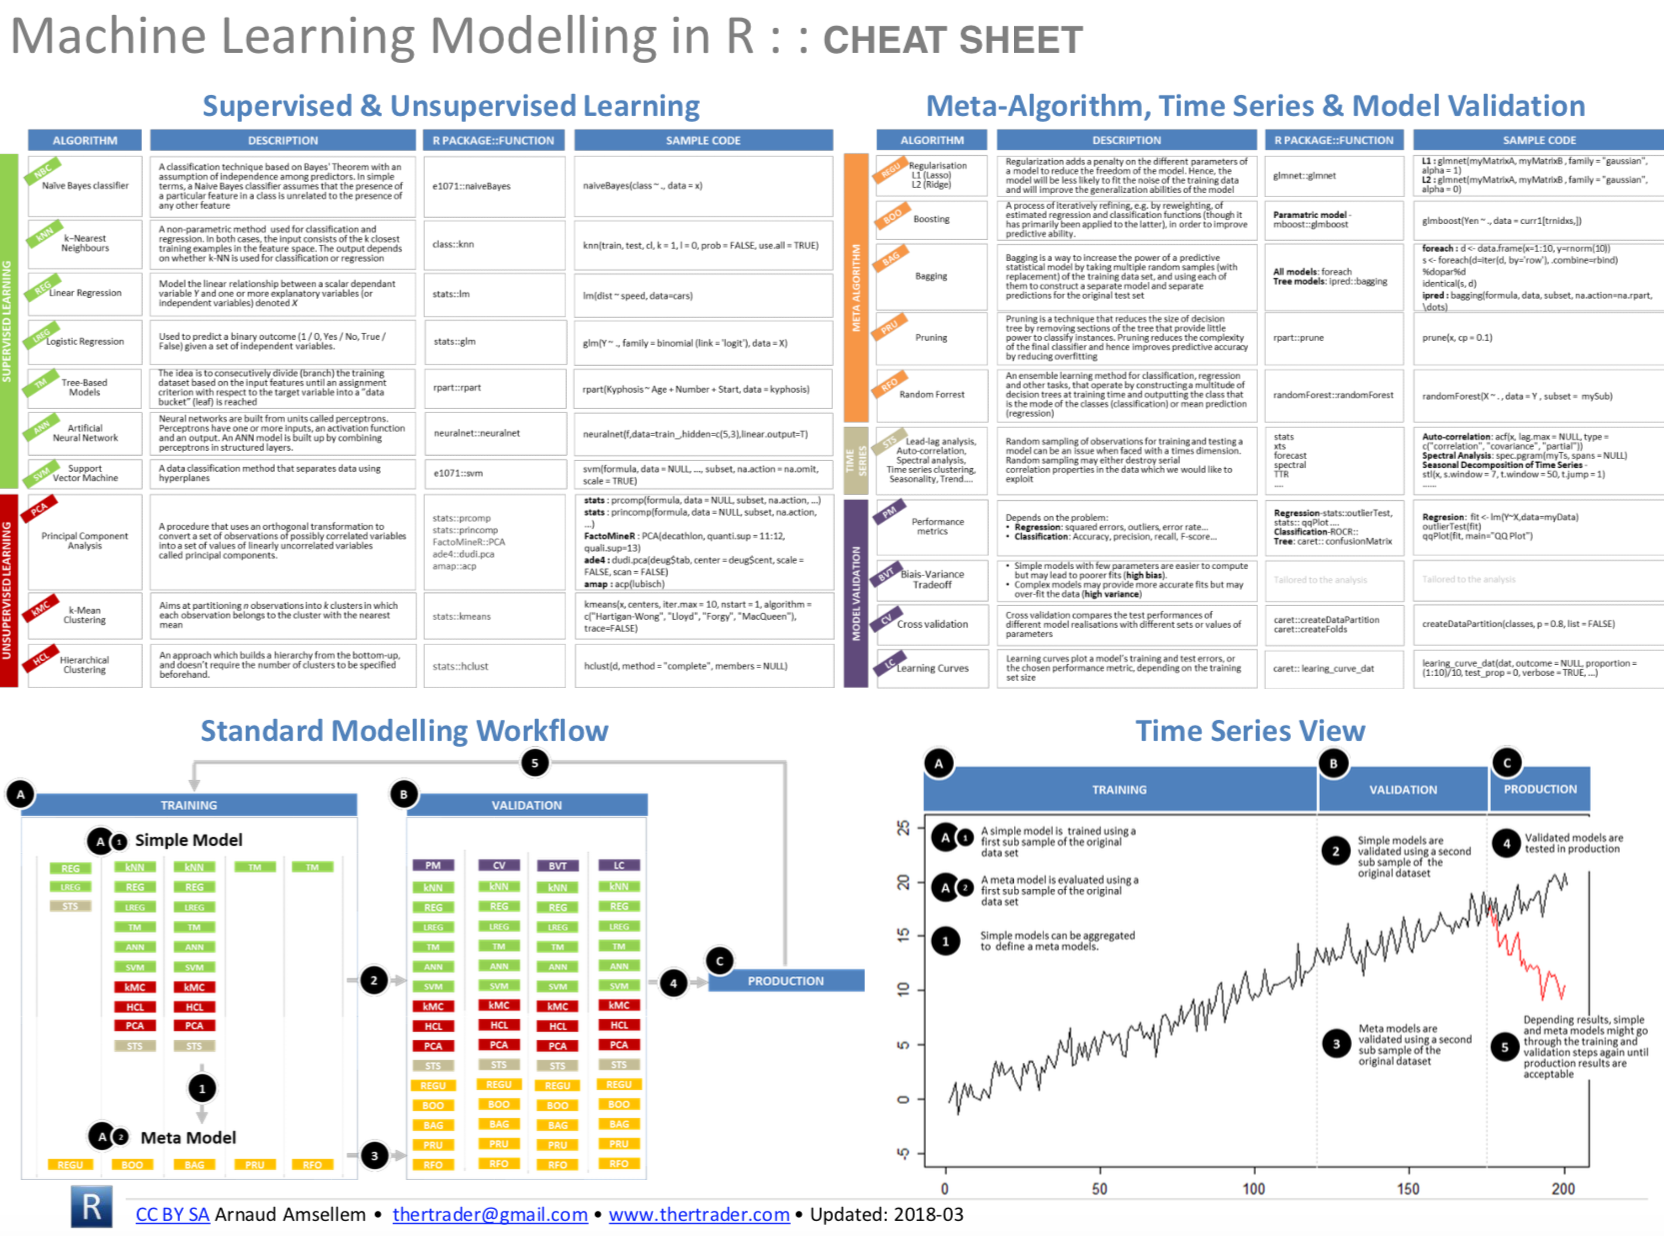

## Many people use R for Machine Learning / complicated regression tasks. Let's walk through creating a simple linear repression model where we try to predict a patient's total cholesterol from the number of cigarrettes that they smoke a day.

In [ ]:
# Create our test and training sets
trainingRowIndex <- sample(1:nrow(fram), 0.8*nrow(fram))
trainingData <- fram[trainingRowIndex,] # Selects all the indicies in trainingRowIndex
testData  <- fram[-trainingRowIndex,] # Selects all the indicies NOT in trainingRowIndex

In [ ]:
dim(trainingData)

In [ ]:
dim(testData)

In [ ]:
# Let's try to predict total cholesterol from cigsPerDay
lm_model <- lm(totChol ~ cigsPerDay, data=trainingData)  # Build the model; equivalent to model.fit() in sklearn
chol_pred <- predict(lm_model, testData) # Generate predictions on the test data; equivalent to model.predict(testData)

In [ ]:
# Gives us summary statistics of the regression model
summary(lm_model)

In [ ]:
# Creating a new data frame with both the actual cholesterol levels and predicted levels
chol_levels <- data.frame(cbind(actual=testData$totChol, predicted=chol_pred))
# Can use the cor() function to get the TP/ FP matrix
correlation_accuracy <- cor(chol_levels)
correlation_accuracy

In [ ]:
# Use the built-in plot() function wrapper with dplyr to compare the labels
plot(chol_levels$predicted, chol_levels$actual,
      xlab="predicted",ylab="actual")

In [ ]:
# Another way of creating the same plot
ggplot() + geom_point(data = chol_levels, 
                       aes(x = chol_levels[,'actual'], y=chol_levels[,'predicted']), 
                       colour='black') + xlab("predicted") + ylab("actual")

# Additional Materials and Analysis with Framingham
Framingham In-Depth Analysis: https://rpubs.com/Shaahin/Framingham


Regression and ML Analysis: https://www.machinelearningplus.com/machine-learning/complete-introduction-linear-regression-r/